# Управление обращенным маятником на тележке

## Петрова Дарья (Б03-908)

## Постановка задачи
Рассмотреть эталонную систему **Inverted Pendulum on a Cart (IPCS)**. Использовать метод функций Ляпунова для управления системой и анализа ее устойчивости.
$$ $$
Параметры системы:
$$ m = 0.21, \qquad M = 0.815,\qquad g = 9.8, \qquad l=0.305. $$

Система имеет 4 переменных состояния: $ [x,\dot{x}, \theta, \dot{\theta}] $ и один выходной параметр $  u $.

Уравнения движения системы после линеаризации:

$
\left[
  \begin{array}{ccc}
     \ddot{x}  \\
     \ddot{\theta}  \\
  \end{array}
\right] 
=
\left[
  \begin{array}{ccc}
     4u + \frac{4(M+m)gtan(\theta)-3mgsin(\theta)cos(\theta)}{4(M+m)-3mcos(\theta)^2} \\
     \frac{-3ucos(\theta)}{l}  \\
  \end{array}
\right]
$

Ограничения: $$ S: [-1,1]^4, U: [-20, 20], I: \cal{B_{0.1}}(x) , T: \cal{B_{0.1}}(x) $$

Функция Ляпунова:
$$ V = + 11.64\dot{\theta}^2 + 45.93\dot{\theta}\theta + 85.47\theta^2 + 12.15x\dot{\theta} + 36.57x\theta + 6.44x^2 + 15.07\dot{\theta}\dot{x} + 33.06\dot{x}\theta + 8.98\dot{x}x + 6.09x^2 $$

Источник: Hadi Ravanbakhsh and Sriram Sankaranarayanan, Learning Lyapunov (Potential) Functions from Counterexamples and Demonstrations [1]

# Решение

In [30]:
import math
import sympy
from sympy.solvers import solve
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

## Параметры системы

In [31]:
#Параметры системы
m = 0.21
M = 0.815
g = 9.8
l = 0.305

## Начальные условия

In [32]:
#Задаем начальные условия
x0 = np.empty(4)
x0[0] = 0.5
x0[1] = 1
x0[2] = 0
x0[3] = 0
print(x0)

[0.5 1.  0.  0. ]


## Теорема Ляпунова
Рассмотрим систему
$$\dot{x} = f(x)$$

и её равновесие $x = 0$.

Пусть существует функция  $V(x,t)$ такая что
$$\left\{ \tag{1}
\begin{array}\\
V(x) > 0, \qquad x >0 \\
V(x) = 0, \qquad x = 0
\end{array}
\right.$$

Рассмотрим её производную по времени в силу уравнений движения ($\dot{x}$ будем заменять на $f(x)$)
$$\dot{V}(x) = \sum_{i} \frac{\partial V}{\partial x}\cdot \dot{x} = \sum_{i} \frac{\partial V}{\partial x}\cdot f(x) = \nabla{V} \cdot f(x)$$

Потребовав 

$$\nabla{V} \cdot f(x) < 0 \tag{2}$$ 

мы обеспечим сходимость траекторий к нулю.

Таким образом, существование функции $V(x)$, удовлетворяющей условиям (1) и (2) гарантирует асимптотическую устойчивость нулевого равновесия системы. Функция $V(x)$ в этом случае называется функцией Ляпунова.


## Система перевернутого маятника на тележке
![model](./1.png)
Устройство состоит из шеста, точка поворота которого установлена на тележке. Маятник может свободно вращаться вокруг своей
точки поворота. Тележка может перемещаться горизонтально перпендикулярно маятнику оси и приводится в действие горизонтальной силой. Цель управления состоит в том, чтобы стабилизировать механизм вокруг точки неустойчивого равновесия путем приложения силы к тележке. Закон управления основан на подходе Ляпунова в сочетании с подходящей линеаризацией с частичной обратной связью для IPCS.

Применение 2-ой закона Ньютона позволило описать данную систему следующими уравнениями движения:
$$ (M+m)\ddot{x}\ +\ mlcos\theta\ddot{\theta}\ -\ mlsin\theta\dot{\theta}^2 = f $$
$$ ml cos\theta\ddot{x} + ml^2\ddot{\theta} - mgl sin\theta = 0 $$

$x : смещение \ тележки\ [м]; $ 

$\theta : угол,\ который\ образует\ маятник\ с\ вертикалью\ [rad]; $

$f  : сила,\ приложенная\ к\ тележке,\ действующая\ как\ управляющий\ вход\ [Н]; $

$m  : масса\ тележки\ [кг]; $

$M  :  масса\ маятника\ [кг]; $

$l : длина\ маятника\ [м]; $

$g : ускорение\ свободного\ падения\ [м/с^2]; $

Переобозначим переменные, используемые в исходных уравнениях движения, следующим образом:

$$ \boldsymbol{x}  = (x, \theta, \dot{x}, \dot{\theta})^T = (x_1, x_2, x_3, x_4)^T$$

Тогда уравнения движения:
$ \boldsymbol{\dot{x}} = 
\left[
  \begin{array}{ccc}
     \dot{x_1}  \\
     \dot{x_2}  \\
     \dot{x_3} \\
     \dot{x_4} \\
  \end{array}
\right] 
=
\left[
  \begin{array}{ccc}
     x3 \\
     x4 \\
     4u + \frac{4(M+m)gtan(x_2)-3mgsin(x_2)cos(x_2)}{4(M+m)-3mcos(x_2)^2} \\
     \frac{-3ucos(x_2)}{l}  \\
  \end{array}
\right]
$

Функция Ляпунова в новых обозначениях:
$$ V = + 11.64x_4^2 + 45.93x_4x_2 + 85.47x_2^2 + 12.15x_1x_4 + 36.57x_1x_2 + 6.44x_1^2 + 15.07x_4x_3 + 33.06x_3x_2 + 8.98x_3x_1 + 6.09x_1^2 $$

При дальнейших расчетах было обнаружено, что в статье [1] допущена опечатка при записи функции Ляпунова.
Поэтому функция Ляпунова на самом деле имеет следующий вид:
$$ V = + 11.64\dot{\theta}^2 + 45.93\dot{\theta}\theta + 85.47\theta^2 + 12.15x\dot{\theta} + 36.57x\theta + 6.44x^2 + 15.07\dot{\theta}\dot{x} + 33.06\dot{x}\theta + 8.98\dot{x}x + 6.09\theta^2 $$

И соответсвенно, в новых обозначениях

$$ V = + 11.64x_4^2 + 45.93x_4x_2 + 85.47x_2^2 + 12.15x_1x_4 + 36.57x_1x_2 + 6.44x_1^2 + 15.07x_4x_3 + 33.06x_3x_2 + 8.98x_3x_1 + 6.09x_3^2 $$

Проверим, что функция Ляпунова удовлетворяет условиям теоремы Ляпунова:
$$ \qquad\qquad\qquad\qquad  V(0) = 0; \qquad (1) $$
$$ (\forall{x} \in{S}\setminus\{0\}) \qquad V(x) > 0;\qquad(2) $$
$$ (\forall{x} \in{S}\setminus\{0\}, \exists{u}\in{U})  \qquad \nabla{V}\cdot{f(x, u)} < 0; \qquad (3) $$

$$1)  V(0) = V(0,0,0,0) = 0  - условие\ 1\ выполняется. $$
$$ $$
$$2) Нужно\ проверить,\ что\ V(x)\ является\ положительно\ определенным\ многочленом\ для\ x\in{S}.\ Согласно\ статье\ [1],\ это\ сводится\ к\qquad проверке\ следующего\ условия:\ $$
$$ (\exists{x} \in{S}\setminus\{0\}) \qquad V(x) \leq{0}; $$
$$ Пусть\ x_0=(0,0,-1,1)^T.\ Тогда\ V(x_0)=11.64-15.07=-3.43 \leq{0} - условие\ 2\ выполняется. $$
$$ $$
$$ 3)Проверка\ третьего\ условия\ сводится\ к\ поиску\ такой\ функции\ управления\  u(x),\ при\ которой\ \boldsymbol{\dot{V}}\ <\ 0\ (\forall{x} \in{S}\setminus\{0\}). $$

Тригонометрические и рациональные функции аппроксимируем с помощью разложения в ряд Маклонена полиномами 3-ей степени.

In [33]:
# Аппроксимируем функции

def tg_appr(x):
    return x + x**3/3

def sin_appr(x):
    return x - x**3/math.factorial(3)

def cos_appr(x):
    return 1 - x**2/math.factorial(2)

def sin_cos_appr(x):
    return x - x**3/math.factorial(2) - x**3/math.factorial(3)

In [34]:
#Перепишем выражения в правой части уравнений с учетом аппроксимации

def a(x, u):
    return 4*u + (4*(M+m)*g*tg_appr(x) - 3*m*g*sin_cos_appr(x))/(4*(M+m)-3*m*cos_appr(x)**2)

def b(x, u):
    return (-3*u*cos_appr(x))/l

Ищем производную заданной функции Ляпунова. Используем уравнения движения.

In [35]:
x1, x2, x3, x4, u = symbols('x1 x2 x3 x4 u')

#Функция Ляпунова. В статье опечатка - последнее слагаемое неправильно
V = 11.64*x4*x4 + 45.93*x2*x4 + 85.47*x2*x2 + 12.15*x1*x4 + 36.57*x1*x2 + 6.44*x1*x1 + 15.07*x3*x4 + 33.06*x2*x3 + 8.98*x1*x3 + 6.09*x3*x3
#Производная функции Ляпунова
deriv_v = diff(V, x1)*x3 + diff(V, x2)*x4 + diff(V, x3)*a(x2, u) + diff(V, x4)*b(x2, u)

print(deriv_v)
derive_v_lambdify = lambdify([x1, x2, x3, x4, u], deriv_v)
#Производная функции Ляпунова в начальный момент
#print(derive_v_lambdify(x0[0], x0[1], x0[2], x0[3])) 

-9.83606557377049*u*(1 - x2**2/2)*(12.15*x1 + 45.93*x2 + 15.07*x3 + 23.28*x4) + x3*(12.88*x1 + 36.57*x2 + 8.98*x3 + 12.15*x4) + x4*(36.57*x1 + 170.94*x2 + 33.06*x3 + 45.93*x4) + (4*u + (17.5093333333333*x2**3 + 34.006*x2)/(4.1 - 0.63*(1 - x2**2/2)**2))*(8.98*x1 + 33.06*x2 + 12.18*x3 + 15.07*x4)


Находим такую функцию управления $ u(x),$ при которой $ \boldsymbol{\dot{V}}\ <\ 0\ (\forall{x} \in{S}\setminus\{0\}). $ Пусть $ \dot{V} = -x_1^2 - x_2^2 - x_3^2 - x_4^2< 0 $ при $(x_1, x_2, x_3, x_4) \neq (0,0,0,0)$.

In [36]:
#Подбираем функцию u(x), так чтобы V(x) <=0 для всех (x1, x2, x3, x4)
#Пусть V' = -x1*x1 - x2*x2 - x3*x3 - x4*x4
#Решаем уравнение

u1_solution = solve(deriv_v + x1*x1 + x2*x2 + x3*x3 + x4*x4, u)
print(u1_solution)

#Решение есть, нашли функцию управления u-> V - это функция Ляпунова

#Функция управления
u_lambdify = lambdify([x1, x2, x3, x4], u1_solution)

#Функция управления в начальный момент времени
#print(u_lambdify(x0[0], x0[1], x0[2], x0[3])[0]) 

[6.1e-10*(-157500000000000.0*x1**2*x2**4 + 630000000000000.0*x1**2*x2**2 + 3.47e+15*x1**2 - 2.0286e+15*x1*x2**4*x3 - 5.759775e+15*x1*x2**4*x4 + 1.57233813333333e+17*x1*x2**3 + 8.1144e+15*x1*x2**2*x3 + 2.30391e+16*x1*x2**2*x4 + 3.0537388e+17*x1*x2 + 4.46936e+16*x1*x3 + 1.268979e+17*x1*x4 - 157500000000000.0*x2**6 - 5.759775e+15*x2**5*x3 - 2.692305e+16*x2**5*x4 - 1.57185e+15*x2**4*x3**2 - 7.120575e+15*x2**4*x3*x4 - 7.391475e+15*x2**4*x4**2 + 5.79488559999999e+17*x2**4 + 2.3630278e+17*x2**3*x3 + 3.71557853333333e+17*x2**3*x4 + 6.2874e+15*x2**2*x3**2 + 2.84823e+16*x2**2*x3*x4 + 2.95659e+16*x2**2*x4**2 + 1.12770836e+18*x2**2 + 5.4109098e+17*x2*x3 + 1.10563222e+18*x2*x4 + 3.46306e+16*x3**2 + 1.568787e+17*x3*x4 + 1.628471e+17*x4**2)/(5740875.0*x1*x2**6 - 30994236.0*x1*x2**4 - 94358556.0*x1*x2**2 + 176931136.0*x1 + 21701925.0*x2**7 + 7120575.0*x2**6*x3 + 10999800.0*x2**6*x4 - 117506592.0*x2**5 - 38042676.0*x2**4*x3 - 60207399.0*x2**4*x4 - 355335732.0*x2**3 - 118637196.0*x2**2*x3 - 177512004.0*

Выбор данной функции управления удовлетворяет третьему условию теоремы Ляпунова. Следовательно, заданная функция действительно является функцией Ляпунова. Это гарантирует нам асимптотическую устойчивость нулевого равновесия системы.

In [37]:
#Функция управления
def u(x):
    res = u_lambdify(x[0], x[1], x[2], x[3])[0]
    return res

#Динамическая система
def equation(t, x):
    dxdt = np.empty(4)
    dxdt[0] = x[2]
    dxdt[1] = x[3]
    dxdt[2] = 4*u(x) + (4*(M+m)*g*tg_appr(x[1]) - 3*m*g*sin_appr(x[1])*cos_appr(x[1]))/(4*(M+m)-3*m*cos_appr(x[1])**2)
    dxdt[3] = (-3*u(x)*cos_appr(x[1]))/l
    
    #print('u=', u(x))
    #print('dvdt= ', derive_v_lambdify(x[0], x[1], x[2], x[3], u(x)))
    #print('---')
    return dxdt

t0 = 0.
tf = 100.
t_eval = np.arange(t0, tf, 0.01)

sol = solve_ivp(lambda t, x: equation(t, x), (t0,tf), x0, t_eval = t_eval)
x = sol.y.T
t = sol.t

In [39]:
#Задаем ограничения
def lim(n, a, b):
    s1 = []
    for i in range(n):
        s1.append(a)
    s2 = []
    for i in range(n):
        s2.append(b)
    return s1, s2

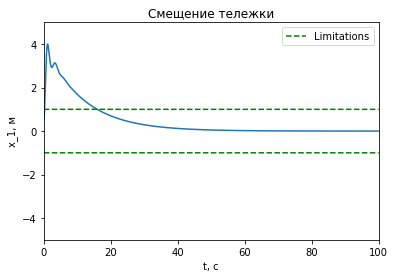

In [40]:
n = len(x[:,0])
time = np.linspace(0, 100, n)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_1, м')
ax1.set_xlabel('t, с')
ax1.set_title('Смещение тележки')
ax1.set_xlim([0, 100])
ax1.set_ylim([-5, 5])
ax1.plot(time,x[:,0])
s1, s2 = lim(n, 1, -1)
ax1.plot(time, s1, linestyle='dashed', color = 'green', label = 'Limitations')
ax1.plot(time, s2, linestyle='dashed', color = 'green')
ax1.legend()

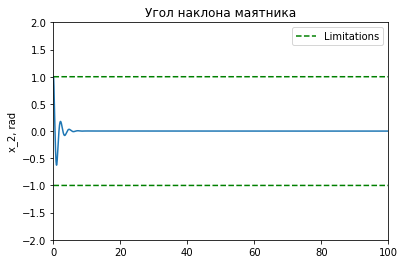

In [41]:
n = len(x[:,1])
time = np.linspace(0, 100, n)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_2, rad')
ax1.set_title('Угол наклона маятника')
ax1.set_xlim([0, 100])
ax1.set_ylim([-2, 2])
ax1.plot(time,x[:,1])
s1, s2 = lim(n, 1, -1)
ax1.plot(time, s1, linestyle='dashed', color = 'green', label = 'Limitations')
ax1.plot(time, s2, linestyle='dashed', color = 'green')
ax1.legend()

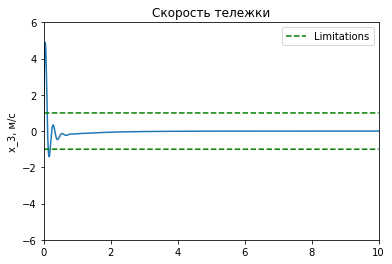

In [42]:
n = len(x[:,2])
time = np.linspace(0, 10, n)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_3, м/с')
ax1.set_title('Скорость тележки')
ax1.set_xlim([0, 10])
ax1.set_ylim([-6, 6])
ax1.plot(time,x[:,2])
s1, s2 = lim(n, 1, -1)
ax1.plot(time, s1, linestyle='dashed', color = 'green', label = 'Limitations')
ax1.plot(time, s2, linestyle='dashed', color = 'green')
ax1.legend()

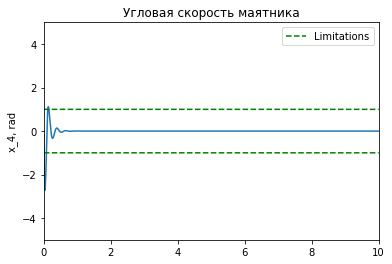

In [43]:
n = len(x[:,3])
time = np.linspace(0, 10, n)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('x_4, rad')
ax1.set_title('Угловая скорость маятника')
ax1.set_xlim([0, 10])
ax1.set_ylim([-5, 5])
ax1.plot(time,x[:,3])
s1, s2 = lim(n, 1, -1)
ax1.plot(time, s1, linestyle='dashed', color = 'green', label = 'Limitations')
ax1.plot(time, s2, linestyle='dashed', color = 'green')
ax1.legend()

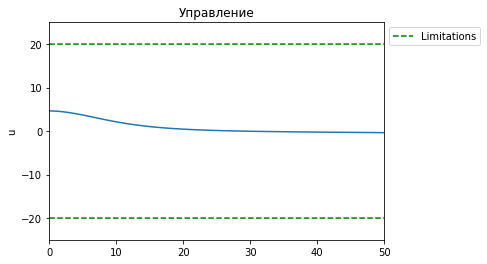

In [44]:
u1 = []
for i in x:
    c = u(i)
    u1.append(c)

n = len(u1)
time = np.linspace(0, 50, n)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylabel('u')
ax1.set_title('Управление')
ax1.set_ylim([-25, 25])
ax1.set_xlim([0, 50])
ax1.plot(u1)
s1, s2 = lim(n, 20, -20)
ax1.plot(time, s1, linestyle='dashed', color = 'green', label = 'Limitations')
ax1.plot(time, s2, linestyle='dashed', color = 'green')
ax1.legend(bbox_to_anchor=(1, 1))

## Литература


1) Hadi Ravanbakhsh and Sriram Sankaranarayanan, Learning Lyapunov (Potential) Functions from Counterexamples and Demonstrations (https://arxiv.org/pdf/1705.09619.pdf)

2) Control Theory Course (https://github.com/DPritykin/Control-Theory-Course/tree/main/Term%202%20Nonlinear%20Dynamics%20and%20Control/Lecture%20Jupyter%20Notebooks)

3) Maria Landry, Sue Ann Campbell, Kirsten Morris, and Cesar O Aguilar. Dynamics of an inverted pendulum with delayed feedback control. (https://www.geneseo.edu/~aguilar/public/assets/papers/dynamics_delayed_feedback_Landry-Campbell-Morris-Aguilar_SIAM05.pdf)

4) Carlos Aguilar I., Octavio Gutierrez F. and Miguel S. Suarez C., Lyapunov Based Controller for the Inverted Pendulum Cart System (https://vk.com/doc199758746_648976579?hash=3Gki6tZdng9iCz29VlBr0AhBuNqdCEHTA0ykWZzRBJ8&dl=0vIWzmisNbgzfsZJeATfV64cZS23vtxSHLd6vkTEGB0)